In [1]:
# Applying Ridge regularization technique on the heating dataset with added polynomial features.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [3]:
heating = pd.read_csv("heating_1.csv")

In [4]:
Y = heating['Y1']
X = heating.drop('Y1',axis = 1)

In [5]:
# for k in range(1,9):
#     S = (X[("X%s")%(str(k))].values) ** 2
#     S_pandas = pd.Series(S)
#     X[("X%s_2")%(str(k))] = S_pandas

In [6]:
for k in range(1,9):
    S = (X[("X%s")%(str(k))].values) ** 3
    S_pandas = pd.Series(S)
    X[("X%s_3")%(str(k))] = S_pandas

In [7]:
count = 24
for i in range(1,9):
    for j in range(i,9):
        pairwise_combinations = (X[("X%s")%(str(i))].values)*(X[("X%s")%(str(j))].values)
        pair_combos = pd.Series(pairwise_combinations)
        X[("X%s%s")%(str(i),str(j))] = pair_combos
        count = count + 1
        

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [23]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha = 0.001, normalize = True)
ridgeReg.fit(X_train, Y_train)
pred = ridgeReg.predict(X_test)

In [24]:
mse = np.mean((pred - Y_test)**2)

In [25]:
print("MSE on test data is {}".format(np.sqrt(mse)))  

MSE on test data is 2.14116021939


In [26]:
coef = ridgeReg.coef_

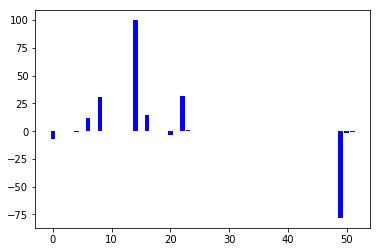

In [27]:
N = len(coef)
x = range(N)
plt.bar(x,coef,color='blue')
plt.show()

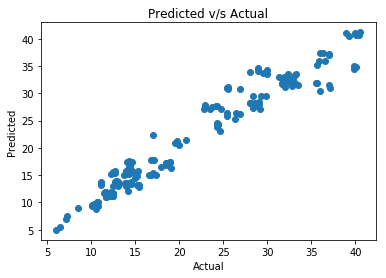

In [28]:
plt.scatter(Y_test, pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted v/s Actual")
plt.show()

In [29]:
heating = X

In [30]:
type(heating)
heating['Y1'] = Y
heating.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X1_3,X2_3,...,X56,X57,X58,X66,X67,X68,X77,X78,X88,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,0.941192,1.361934e+08,...,14.0,0.0,0.0,4,0.0,0,0.0,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,0.941192,1.361934e+08,...,21.0,0.0,0.0,9,0.0,0,0.0,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,0.941192,1.361934e+08,...,28.0,0.0,0.0,16,0.0,0,0.0,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,0.941192,1.361934e+08,...,35.0,0.0,0.0,25,0.0,0,0.0,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,0.729000,1.789294e+08,...,14.0,0.0,0.0,4,0.0,0,0.0,0.0,0,20.84


In [31]:
file = open("expanded_heating.csv", "w")
file.write((heating.to_csv()))
file.close()

In [32]:
pred_train = ridgeReg.predict(X_train)

In [33]:
mse_train = np.mean((pred_train - Y_train)**2)

In [34]:
print("MSE on train data is {}".format(np.sqrt(mse_train)))

MSE on train data is 2.26479417052


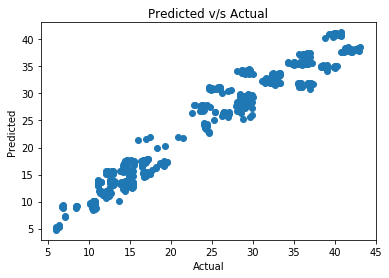

In [35]:
plt.scatter(Y_train, pred_train)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted v/s Actual")
plt.show()

In [36]:
pd.DataFrame(zip(X.columns, ridgeReg.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,X1,-6.966990e+00
1,X2,3.029363e-02
2,X3,1.079904e-02
3,X4,5.196448e-02
4,X5,-1.172449e+00
5,X6,-2.905281e-02
6,X7,1.152607e+01
7,X8,3.889337e-01
8,X1_3,3.112265e+01
9,X2_3,-1.999220e-09


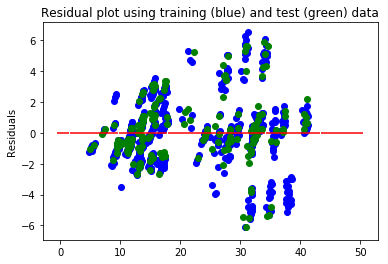

In [38]:
plt.scatter(pred_train, pred_train - Y_train, c = 'b')
plt.scatter(pred, pred - Y_test, c = 'g')
plt.scatter(np.linspace(0,50),np.zeros(shape = 50), c = 'r', marker = '_')
plt.title('Residual plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.show()